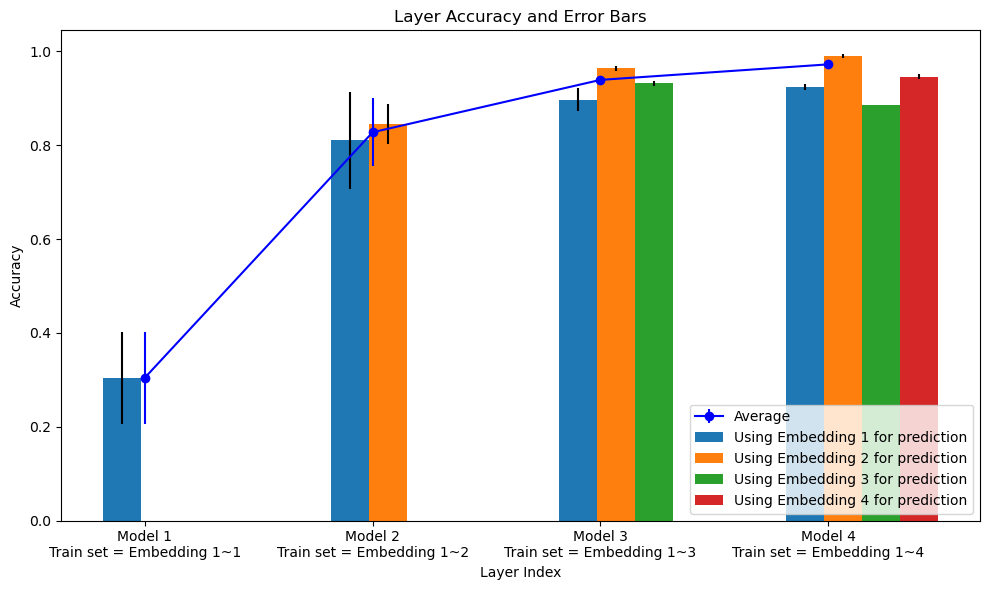

<Figure size 640x480 with 0 Axes>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Data grouped in sets of three rows, where each set is a distinct plot group
data = [
    [0.21052631578947367, 0.21052631578947367, None, None, None],
    [0.40669856459330145, 0.40669856459330145, None, None, None],
    [0.2966507177033493, 0.2966507177033493, None, None, None],
    [0.8660287081339713, 0.8720379146919431, 0.8599033816425121, None, None],
    [0.7440191387559809, 0.6919431279620853, 0.7971014492753623, None, None],
    [0.8732057416267942, 0.8672985781990521, 0.8792270531400966, None, None],
    [0.9441786283891547, 0.9095022624434389, 0.970873786, 0.9271844660194175, None],
    [0.9298245614035088, 0.8687782805429864, 0.9611650485436893, 0.9368932038834952, None],
    [0.9441786283891547, 0.9140271493212669, 0.9611650485436893, 0.9320388349514563, None],
    [0.9700956937799043, 0.9181034482758621, 0.9905660377358491, 0.8867924528301887, 0.9433962264150944],
    [0.9748803827751196, 0.9224137931034483, 0.9952830188679245, 0.8867924528301887, 0.9528301886792453],
    [0.972488038, 0.9310344827586207, 0.9858490566037735, 0.8867924528301887, 0.9433962264150944]
]

# Process data to calculate means and standard deviations for the first column, and prepare the rest for bar plots
processed_data = []
for i in range(0, len(data), 3):
    subset = data[i:i+3]
    means = [np.mean([x[0] for x in subset])]
    stds = [np.std([x[0] for x in subset], ddof=1)]
    
    # Max layers across subsets for alignment
    max_layers = max(len(row) for row in subset)
    for layer in range(1, max_layers):
        layer_values = [x[layer] for x in subset if x[layer] is not None]
        means.append(np.mean(layer_values))
        stds.append(np.std(layer_values, ddof=1))
    
    processed_data.append((means, stds))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x_ticks = np.arange(1, max(len(means) for means, stds in processed_data))

# Line plot for error bars (Layer 1 mean and std)
means, stds = zip(*[([x[0]], [y[0]]) for x, y in processed_data])
means = np.concatenate(means)
stds = np.concatenate(stds)
ax.errorbar(x_ticks[0:len(means)], means, yerr=stds, fmt='-o', label='Average', color='blue')

# Determine the number of groups and number of bars in each group
n_groups = len(processed_data)
n_bars = len(processed_data[0][0]) - 1  # Exclude the first bar which is plotted as error bar

# Calculate bar width
bar_width = 1 / (n_bars + 2)  # Adding space for separation
index = np.arange(n_groups) +0.9

for i in range(n_bars):
    means = [group[0][i+1] if len(group[0]) > i+1 else 0 for group in processed_data]
    stds = [group[1][i+1] if len(group[1]) > i+1 else 0 for group in processed_data]
    ax.bar(index + i * bar_width, means, bar_width, yerr=stds, label=f'Using Embedding {i+1} for prediction')
        
ax.set_xlabel('Layer Index')
ax.set_ylabel('Accuracy')
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'Model {i}\nTrain set = Embedding 1~{i}' for i in range(1, len(x_ticks) + 1)])
ax.legend(loc='lower right')
plt.title('Layer Accuracy and Error Bars')
plt.tight_layout()
plt.show()

plt.savefig('layer_accuracy.png')

In [30]:
processed_data

[([0.30462519936204147, 0.30462519936204147, nan, nan, nan],
  [0.09832894827303576, 0.09832894827303576, nan, nan, nan]),
 ([0.8277511961722488, 0.8104265402843601, 0.8454106280193238, nan, nan],
  [0.07260282729901199, 0.10263700392278535, 0.04293813728171784, nan, nan]),
 ([0.9393939393939394,
   0.8974358974358974,
   0.9644012943624595,
   0.9320388349514563,
   nan],
  [0.008287324438128579,
   0.024921133698127134,
   0.005605342183892341,
   0.004854368932038833,
   nan]),
 ([0.972488038185008,
   0.9238505747126436,
   0.9905660377358491,
   0.8867924528301887,
   0.9465408805031448],
  [0.0023923444976076177,
   0.006584160481258362,
   0.004716981132075471,
   0.0,
   0.0054467006527323175])]